In [181]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Session 2: Numpy and Pandas
We will use these two libraries to do the following:
* __Numpy:__ make arrays and matrices, change their shapes, perform math operations on them, compute sums and means.
* __Pandas:__ Read, clean, summarize and plot data.

#### 1. Why use Numpy?

Python has built-in number objects (ints, floats) and container objects (lists, tuples). Lists can contain any object types, which are retrieved from elsewhere in memory, with a range of functionality to insert and change items. By contract, Numpy arrays are homogenous (only numbers) and are optimized for speed in operations like matrix algebra.

In [9]:
# speed test - regular

my_range = range(1000)
%timeit [i**2 for i in my_range]

216 µs ± 835 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
# speed test - numpy

my_array = np.arange(1000)
%timeit my_array ** 2

805 ns ± 8.64 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### 2. Creating arrays

You can create them manually by passing a list. In reality, you're not usually going to type individual values in. More often, you would:
* (a) load existing data from a file (eg. CSV);
* (b) create arrays based on an arithmetic sequence;
* (c) create a spread of values between a start and end-point;
* (d) or create an empty array to populate later.

In [13]:
# create an array from a list:

np.array([1,2,3,4])

array([1, 2, 3, 4])

In [15]:
# from a range:

np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
# equally spaced values between a start and end point:

np.linspace(-5,5,20)

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [129]:
# values to populate later:

np.zeros([4,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
# random numbers with a uniform distribution (default: between 0 and 1):

np.random.random([4,4])

array([[0.23494339, 0.47383913, 0.55662857, 0.8235813 ],
       [0.49281739, 0.35150569, 0.46723797, 0.9188939 ],
       [0.76339471, 0.85830051, 0.57572257, 0.88422427],
       [0.82987559, 0.59093834, 0.56748631, 0.86664508]])

In [27]:
# random numbers with normal distribution centered on 0:

np.random.randn(4)

array([ 0.38225236,  1.19685692,  0.49648456, -0.88418595])

In [55]:
# create a sequence then reshape:

array1 = np.arange(12).reshape([3,4])
array1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [130]:
# the shape attribute tells you the number of rows and columns:

array1.shape

(3, 4)

#### 3. Math operations are performed element-wise
For example `+10`, `*10` or `== 10` would be performed on *each* element in the array.

In [34]:
my_array = np.arange(6)
my_array

array([0, 1, 2, 3, 4, 5])

In [35]:
my_array * 10

array([ 0, 10, 20, 30, 40, 50])

#### 4. Summarize and compute reductions
If you guessed that `ndarray` objects have some pretty useful methods, you guessed right:

In [64]:
array2 = np.arange(100).reshape([10,10])
array2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [39]:
array2.sum()

4950

In [41]:
array2.sum(axis = 0)  # remember, axis 0 means columns.    (Most often you'd sum down columns first...)

array([450, 460, 470, 480, 490, 500, 510, 520, 530, 540])

In [42]:
array2.sum(axis = 1)  # axis 1 means rows

array([ 45, 145, 245, 345, 445, 545, 645, 745, 845, 945])

In [54]:
array2.cumsum()

array([   0,    1,    3,    6,   10,   15,   21,   28,   36,   45,   55,
         66,   78,   91,  105,  120,  136,  153,  171,  190,  210,  231,
        253,  276,  300,  325,  351,  378,  406,  435,  465,  496,  528,
        561,  595,  630,  666,  703,  741,  780,  820,  861,  903,  946,
        990, 1035, 1081, 1128, 1176, 1225, 1275, 1326, 1378, 1431, 1485,
       1540, 1596, 1653, 1711, 1770, 1830, 1891, 1953, 2016, 2080, 2145,
       2211, 2278, 2346, 2415, 2485, 2556, 2628, 2701, 2775, 2850, 2926,
       3003, 3081, 3160, 3240, 3321, 3403, 3486, 3570, 3655, 3741, 3828,
       3916, 4005, 4095, 4186, 4278, 4371, 4465, 4560, 4656, 4753, 4851,
       4950])

In [43]:
array2.max()

99

In [44]:
array2.min()

0

In [48]:
array2.mean(axis = 0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

#### 5. Slice arrays, change their shape

In [60]:
array2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [61]:
array2[5:,5:]

array([[55, 56, 57, 58, 59],
       [65, 66, 67, 68, 69],
       [75, 76, 77, 78, 79],
       [85, 86, 87, 88, 89],
       [95, 96, 97, 98, 99]])

In [62]:
array2[array2 > 50]

array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [69]:
# index arrays based on conditions

array2 = np.arange(100).reshape([10,10])

array2[array2 < 30] = 0

array2

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

## MatPlotLib

#### 6. Plotting
MatPlotLib is a widely used plotting library. You can pass it data directly, either for data exploration purposes or to produce publication quality outputs. Also you should get to know it because Pandas calls it.

In [182]:
# import it like this:

import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [195]:
# Let's make a sine wave and cos wave
X = np.linspace(-10, 10, 200)

In [196]:
C = np.cos(X)
S = np.sin(X)

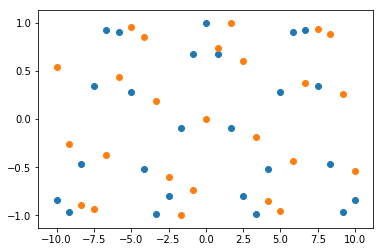

In [190]:
plt.scatter(X, C)
plt.scatter(X, S)

In [193]:
fig = plt.figure()
ax = fig.add_subplot()

<Figure size 432x288 with 0 Axes>

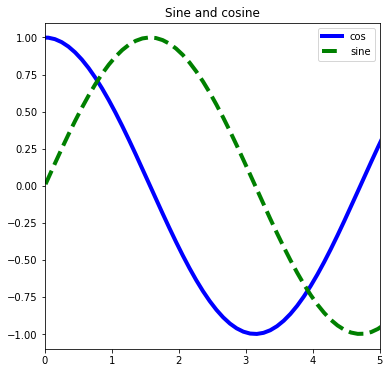

In [201]:
fig, ax = plt.subplots(figsize = [6,6])

ax.plot(X, C, color="blue", linewidth=4, linestyle="-", label = 'cos')
ax.plot(X, S, color="green", linewidth=4, linestyle="--", label = 'sine')
ax.set(title='Sine and cosine')

ax.set(xlim=[0,5])
ax.legend(loc='upper right')


## Pandas

#### 6. Recap: creating Series and DataFrames

In [70]:
# a Series is a Pandas object containing a single array of data.

mySeries = pd.Series([10, 20, 30, 40])
mySeries

0    10
1    20
2    30
3    40
dtype: int64

In [71]:
# it contains an array of values, plus an associated array of data labels, called its index

mySeries.values

array([10, 20, 30, 40])

In [14]:
# you could pass both the values and the index to the Series constructor

mySeries = pd.Series(data = [10,20,30,40], index = ['a','b','c','d'])
mySeries

a    10
b    20
c    30
d    40
dtype: int64

**Note**: in practice, the index would normally be just 0:n for a DataFrame with n elements. Or a time series.

In [73]:
# a Series is built on a Numpy array. It has built-in methods to sort, summarize, handle missing values, export as CSV, etc.

mySeries.mean()

25.0

**DataFrames can be built many ways.** The DataFrame constructor is flexible and pretty intuitive to work with. Pass it a list of items. Pass it a Numpy array.

Or a good approach: pass it a dictionary:
* keys: name of column
* values: data for the column

In [80]:
# Create a dataframe from scratch several ways. A good one is to pass a dictionary containing
# the column name and the values.

goals_scored = pd.DataFrame({"Man Utd": [4, 2, 0, 2],
                         "Liverpool": [2, 3, 0, 5],
                          "Wrexham FC": [0, 0, 0, 1]})

goals_scored

,Man Utd,Liverpool,Wrexham FC
0,4,2,0
1,2,3,0
2,0,0,0
3,2,5,1


In [177]:
print("Average goals this season:", goals_scored['Liverpool'].mean())

Average goals this season: 2.5


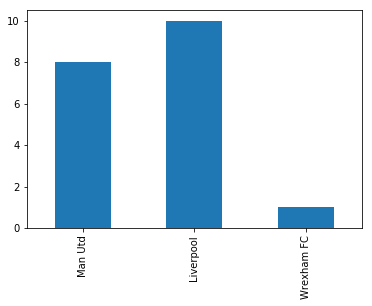

In [81]:
# Pandas has useful built-in plotting via MatplotLib.

goals_scored.sum().plot(kind='bar')

#### 7. Data manipulation - census of firms
This dataset describes characteristics of firms in Dhaka, Bangladesh. 

In [83]:
path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/Spring%202019%208-week%20course/week%204/SampleData/Exercise%201/firms_Dhaka.csv'

In [84]:
df = pd.read_csv(path, encoding = 'utf_8')

In [88]:
# inspect first two rows

df.head(2)

,Unnamed: 0,Geographic,Sector,Size_Frame,Size_Inter,Weights,age,export,exporter,family_own,...,sales_per_,sector_1,share_fore,share_sold,share_wome,size_,wt,years,rank,ID
0,0,Dhaka,Leather and Lather goods,0-9,0-9,1.75,20+years,0,Non-exporter,1,...,2155263.3,leather,0,0,0,Micro,1.42,50,10,0
1,1,Dhaka,Leather and Lather goods,0-9,0-9,1.75,6-10years,0,Non-exporter,1,...,3123123.0,leather,0,0,0,Micro,1.42,10,10,1


In [89]:
# print a list of the columns

df.columns

Index(['Unnamed: 0', 'Geographic', 'Sector', 'Size_Frame', 'Size_Inter',
       'Weights', 'age', 'export', 'exporter', 'family_own', 'female_own',
       'foreign_ow', 'geometry', 'gpsAccurac', 'gpsAltitud', 'Lat', 'Lon',
       'innovative', 'leader', 'limited_li', 'node', 'number_cli',
       'partnershi', 'product_re', 'product_ye', 'public_', 'region',
       'sales_ex_1', 'sales_expo', 'sales_per_', 'sector_1', 'share_fore',
       'share_sold', 'share_wome', 'size_', 'wt', 'years', 'rank', 'ID'],
      dtype='object')

In [90]:
# check the shape

df.shape

(1438, 39)

In [93]:
# a DataFrame is equivalent to several Series glued together. Use square bracket notation, or dot notation, to inspect one Series (ie. a column).

df.years[:5]

0    50
1    10
2    41
3    40
4    38
Name: years, dtype: int64

In [98]:
# summarize this column 

df.years.mean()

14.68219749652295

In [97]:
df.years.describe()

count    1438.000000
mean       14.682197
std        12.125066
min         1.000000
25%         5.000000
50%        10.000000
75%        20.000000
max        80.000000
Name: years, dtype: float64

In [99]:
# check the unique values in a column (good for categorical data)

df.age.unique()

array(['20+years', '6-10years', '16-20years', '11-15years', '0-5years'],
      dtype=object)

In [101]:
# get a count of each unique value

df.age.value_counts()

0-5years      397
20+years      342
6-10years     329
11-15years    189
16-20years    181
Name: age, dtype: int64

In [102]:
# how many firms are foreign owned?

df.foreign_ow.value_counts()

domestic_owned    1435
foreign_owned        3
Name: foreign_ow, dtype: int64

Let's explore growth trends for new firms. Which industries are the new firms concentrated in? (Take domestic firms only.)

In [108]:
# select values where a conditional statement is true (Boolean indexing - Nick's favorite)

df[df.years < 5][:5]

,Unnamed: 0,Geographic,Sector,Size_Frame,Size_Inter,Weights,age,export,exporter,family_own,...,sales_per_,sector_1,share_fore,share_sold,share_wome,size_,wt,years,rank,ID
11,11,Dhaka,Leather and Lather goods,0-9,0-9,1.750000,0-5years,0,Non-exporter,1,...,1500000.00,leather,0,0,0,Micro,1.893333,3,10,11
18,18,Dhaka,Leather and Lather goods,0-9,0-9,1.611940,0-5years,70,Exporter,1,...,1911179.30,leather,0,20,0,Micro,1.307036,3,10,18
23,23,Dhaka,Footwear,0-9,0-9,1.659574,0-5years,0,Non-exporter,1,...,423703.72,footwear,0,0,0,Micro,1.364271,2,10,23
27,27,Dhaka,Footwear,0-9,0-9,1.281690,0-5years,0,Non-exporter,1,...,2500000.00,footwear,0,0,0,Micro,1.556338,2,10,27
31,31,Dhaka,Leather and Lather goods,0-9,0-9,1.611940,0-5years,100,Exporter,0,...,1848275.90,leather,0,20,0,Small,1.307036,4,5,31


In [117]:
df1 = df[df.years < 5]
df2 = df1[df1.foreign_ow == 'domestic_owned']

# df_new_domestic_firms = df[(df.years < 5) & (df.foreign_ow == 'domestic_owned')]      <-- another way to do it

In [118]:
df2.sector_1.value_counts()

footwear             97
plastic              85
light_engineering    63
leather              54
Name: sector_1, dtype: int64

#### 8. Call Matplotlib from Pandas
DataFrames have a helpful set of methods which call MatPlotLib directly. Make a pie chart or line chart from a DataFrame.

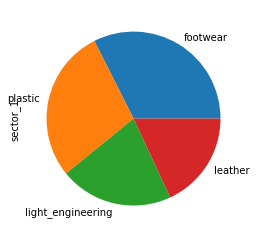

In [179]:
df2.sector_1.value_counts().plot(kind = 'pie')

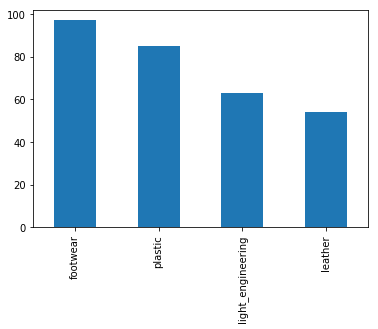

In [180]:
df2.sector_1.value_counts().plot(kind = 'bar')

#### 9. NYC buildings - Load and clean a noisy dataset

In [119]:
# Create a dataframe using read_csv()

#filename = 'pluto_shorter.csv'
url = 'https://github.com/worldbank/Python-for-Data-Science/raw/master/Spring%202019%208-week%20course/week%203/pluto_shorter.csv'

df = pd.read_csv(url)
print('loaded csv with {} rows and {} columns'.format(df.shape[0], df.shape[1]))

loaded csv with 42950 rows and 97 columns


/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [120]:
# Inspect the dataframe (it may be messy)

df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


#### Clean dataset
Also known as 'data munging'

In [121]:
# List the columns and select some

df.columns

my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'unitstotal', 'assesstot']
df = df[my_cols]

In [122]:
# Rename columns

df.columns

df.rename(columns = {'zipcode': 'zip', 'yearbuilt': 'year_built', 'unitstotal': 'housing_units', 'assesstotal': 'assessed_value_USD'},
         inplace = True)

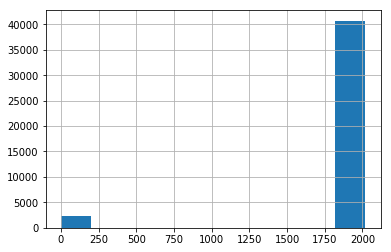

In [123]:
# Check distribution of year_built. Any problem?

df.year_built.hist()

/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


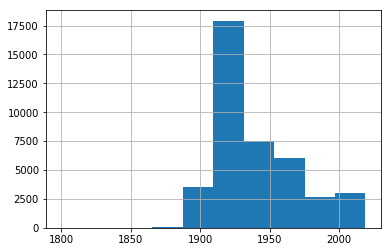

In [124]:
# Presumably few NYC buildings were constructed during the early days of the Roman Empire.
# Set year_built to np.nan for such values.

df.year_built[df.year_built < 1000] = np.nan

df.year_built.hist()

In [125]:
# How many missing values do the columns have?
# We could drop rows with missing values, or impute them based on mean, median or another strategy.

df.isnull().sum()

borough             0
numfloors          30
year_built       2244
landuse           134
zip              1050
housing_units      20
assesstot          20
dtype: int64

In [126]:
print('original shape: ', df.shape)
df.dropna(inplace=True)
print('new shape: ', df.shape)

original shape:  (42950, 7)
new shape:  (40644, 7)


#### Compute summary statistics

In [127]:
# Use methods like max, min and mean() on a column

print("Max floors: ", df.numfloors.max())
print("Mean assessed value: {:.0f}".format(df.assesstot.mean()))

Max floors:  58.0
Mean assessed value: 441861


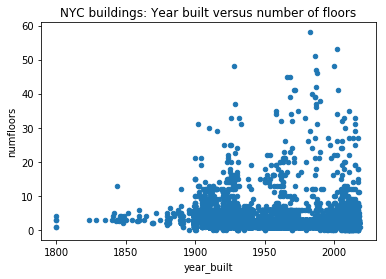

In [128]:
# Use plotting to explore relationships in the data

df.plot(x = 'year_built', y = 'numfloors', kind = 'scatter', title = 'NYC buildings: Year built versus number of floors');